Excercise sheet 2
===
Machine Intelligence 2, SoSe 2016, The Nebenhörers:
---

Danijar Hafner

Thomas Kellermeier

Patrick Kuhn

Jan Szynal

In [80]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Excercise 2.1: PCA: 2-dimensional Toy Data
---

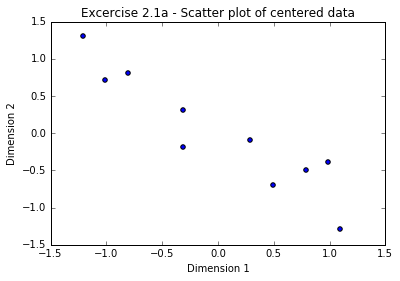

In [81]:
f = open('pca-data-2d.dat.txt')
data = pd.read_table(f, header=None, sep='   ',lineterminator='\n', engine='python')

#center
data = data - data.mean()

#plot
ax = data.plot(kind='scatter', x=0, y=1, title='Excercise 2.1a - Scatter plot of centered data')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2');

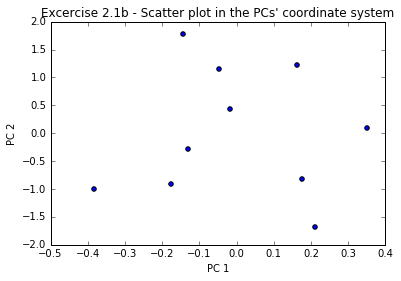

In [82]:
#calculate eigenvectors and eigenvalues
covmat = data.cov()
eigvals, eigvecs = np.linalg.eigh(covmat)

#transform into the coordinate system of the PCAs
datan = np.dot(eigvecs, data.T).T
datan = pd.DataFrame(datan)

#plot
ax = datan.plot(kind='scatter', x=0, y=1, title='Excercise 2.1b - Scatter plot in the PCs\' coordinate system');
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2');

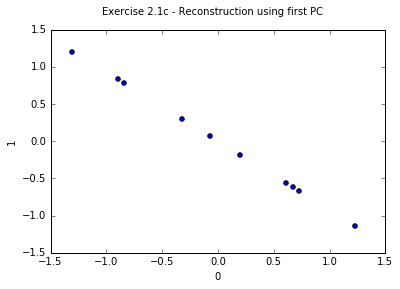

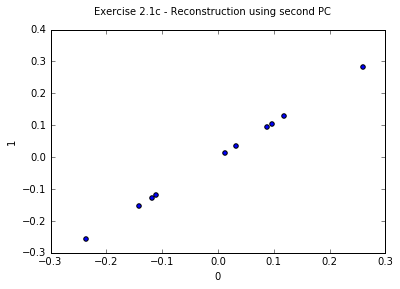

In [83]:
#reconstruction using the first principal component
datan = np.dot(eigvecs[1], data.T)
d = datan.reshape(10,1)
eig = eigvecs[1].reshape(2,1)
datan = np.dot(d,eig.T)

datan = pd.DataFrame(datan)
datan.plot(subplots=True, kind='scatter', x=0, y=1, title='Exercise 2.1c - Reconstruction using first PC')

#reconstruction using the second principal component
datan = np.dot(eigvecs[0], data.T)
d = datan.reshape(10,1)
eig = eigvecs[0].reshape(2,1)
datan = np.dot(d,eig.T)

datan = pd.DataFrame(datan)
datan.plot(subplots=True, kind='scatter', x=0, y=1, title='Exercise 2.1c - Reconstruction using second PC');

Excercise 2.2: PCA: 3-dimensional Toy Data
---

(500, 3)

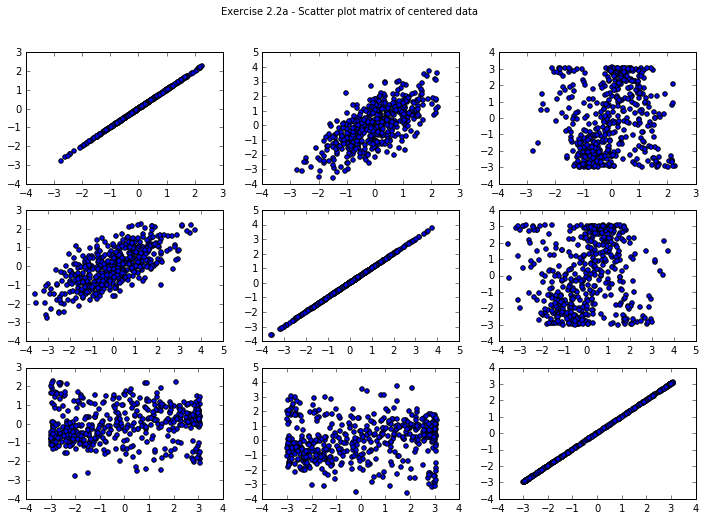

In [100]:
f = open('pca-data-3d.txt')
data = pd.read_table(f, sep=',',lineterminator='\n')

#center
data = data - data.mean()

def scatter_plot_matrix(data, title):
    data = data.as_matrix() if hasattr(data, 'as_matrix') else data
    rank = data.shape[1]
    fig, ax = plt.subplots(nrows=rank, ncols=rank, figsize=(12, 8))
    fig.suptitle(title)
    for x, y in itertools.product(range(rank), repeat=2):
        ax[x, y].scatter(data[:, x], data[:, y])

scatter_plot_matrix(data.as_matrix())
data.shape

KeyError: 2

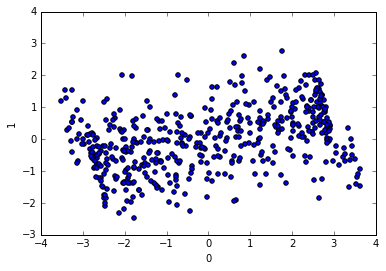

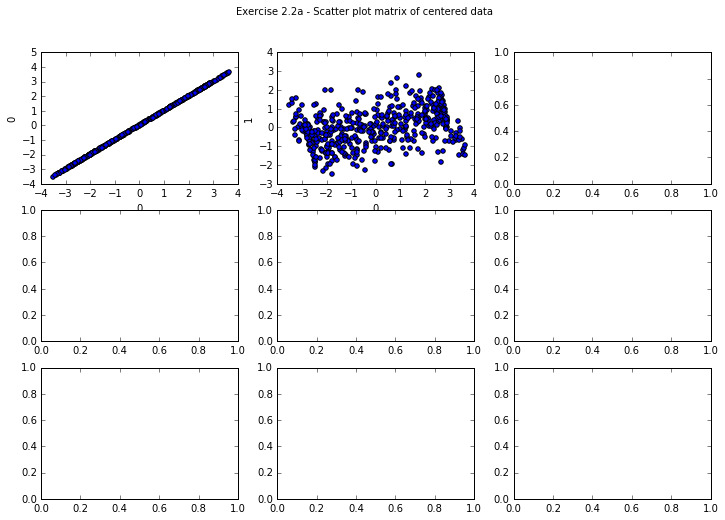

In [89]:
#calculate eigenvectors and eigenvalues
covmat = data.cov()
eigvals, eigvecs = np.linalg.eigh(covmat)

#sort them by the largest eigenvalues
sorted_vecs = sorted(zip(eigvals, eigvecs), key=lambda x: x[0], reverse=True)
eigvecs = [x[1] for x in sorted_vecs]

#2.2B transform into the coordinate system of the PCAs
def transformPCA(data, basis):
    data = np.dot(basis, data.T).T
    return data

# def plotPCA(dataframe, dim):
#     for x, y in itertools.product(range(dim), repeat=2):
#         dataframe.plot(subplots=True, kind='scatter', x=0, y=1, ax=ax[x, y])

for comb in itertools.combinations(range(3), 2):
    selected_pcs = np.array([eigvecs[pos] for pos in comb])
    transformed = transformPCA(data, selected_pcs)
    pd.DataFrame(transformed).plot(kind='scatter', x=0, y=1)
    data = pd.DataFrame(transformed)
    scatter_plot_matrix(data)

In [86]:
    
#2.2C 
for num_pcs in range(3):
    pcs = eigvecs[0:num_pcs + 1]
    pcs = np.array(pcas)
    transformed = transformPCA(data, pcs)
    print(pcs)
    reconstructed = np.dot(pcs, transformed.T).T

    fig = plt.figure()
    ax = Axes3D(fig)
    fig.suptitle('Exercise 2.2c')
    data = reconstructed
    ax.scatter(data[:, 0], data[:, 1], data[:, 2])



IndentationError: expected an indented block (<ipython-input-86-0de257511b8c>, line 4)